# Demonstration of Steady-state Power Flow Analysis

This example demonstrate how to use OpenDER to conduct a steady-state power flow analysis and plot results. This example is converted and simplified from the python script example [here](../OpenDSS_34bus/pymodel/steady_state_simulation.py).

The test circuit is a modified IEEE 34-bus system. The original circuit definition can be found [here](https://cmte.ieee.org/pes-testfeeders/resources/). 

The OpenDSS circuit script can be found [here](../OpenDSS_34bus/IEEE_34Bus/ieee34Mod2_der.dss).

5 x 300 kW PV DERs are added to different buses in the system, using PVSystem element in OpenDSS. These PVSystem elements will be linked to OpenDER through the interface.

```
New PVSystem.PV_1(824) Bus1=824.1.2.3 Phases=3, kV=24.9 Pmpp=300 kVA=300 irradiance=1
New PVSystem.PV_2(858) Bus1=858.1.2.3 Phases=3, kV=24.9 Pmpp=300 kVA=300 irradiance=1 
New PVSystem.PV_3(848) Bus1=848.1.2.3 Phases=3, kV=24.9 Pmpp=300 kVA=300 irradiance=1 
New PVSystem.PV_4(840) Bus1=840.1.2.3 Phases=3, kV=24.9 Pmpp=300 kVA=300 irradiance=1
New PVSystem.PV_5(854) Bus1=854.1.2.3 Phases=3, kV=24.9 Pmpp=300 kVA=300 irradiance=1
```

Circuit diagram below shows the modified system topology.


![Circuit Diagram](../OpenDSS_34bus/IEEE_34Bus/circuit.png).

In [1]:
import matplotlib.pyplot as plt
import pathlib
import os
from opender_interface.opendss_interface import OpenDSSInterface
from opender_interface.der_interface import DERInterface
from opender import DERCommonFileFormat

In [2]:
# circuit path
script_path = pathlib.Path(globals().get("__file__", "./_")).absolute()
circuit_folder = script_path.parents[1].joinpath("OpenDSS_34bus").joinpath("IEEE_34Bus")
dss_file = circuit_folder.joinpath("ieee34Mod2_der.dss")
print(dss_file)  # make sure path to the OpenDSS circuit is correct.

C:\Users\pyma001\PycharmProjects\OpenDER_interface_1\Examples\OpenDSS_34bus\IEEE_34Bus\ieee34Mod2_der.dss


In [3]:
 # create OpenDER interface
ckt = OpenDSSInterface(str(dss_file))
ckt_int = DERInterface(ckt, print_der=False)

# initialize circuit
ckt_int.initialize(DER_sim_type='PVSystem')

In [4]:
# create an OpenDER object to each PVSystem in DSS circuit
der_file = DERCommonFileFormat(NP_VA_MAX=300000,
                               NP_P_MAX=300000,
                               NP_Q_MAX_INJ=300000,
                               NP_Q_MAX_ABS=300000,
                               CONST_PF_MODE_ENABLE=True,
                               CONST_PF=0.9,
                               CONST_PF_EXCITATION='ABS')

# In this example, a single DER configuration file is passed to the interface to create the OpenDER object.
# In this case, the OpenDER interface assumes all DERs has the same rating and control settings
# As another approach, a dictionary can be passed instead of this single configuration.
der_list = ckt_int.create_opender_objs(der_file, p_pu=1)

In [5]:
# print which bus the DER is connected to, and the name of DER as defined in OpenDSS script
for der_obj in der_list:
    print('Bus:', der_obj.bus, ' Name of DER: ', der_obj.name)

Bus: 824  Name of DER:  pv_1(824)
Bus: 858  Name of DER:  pv_2(858)
Bus: 848  Name of DER:  pv_3(848)
Bus: 840  Name of DER:  pv_4(840)
Bus: 854  Name of DER:  pv_5(854)


In [6]:
# Solve power flow
Ps, Qs = ckt_int.der_convergence_process()

The convergence process is an iterative process, that mainly contains the following steps:

1. Copy temporary OpenDER objects so any convergence calculations do not impact their time responses.
2. Read DER terminal voltage
3. Update OpenDER input based on the read terminal voltage
4. Execute OpenDER objects
5. Pass the DER terminal voltage to circuit simulation
6. Solve power flow

The convergence process is considered as completed when two consecutive power flow results are very close.


In [7]:
# Show system voltage profile obtained from power flow
ckt_int.read_sys_voltage()

,kVBaseLL,nPhases,distance,x,y,nodeIndex_A,nodeIndex_B,nodeIndex_C,Vpu_A,Vpu_B,Vpu_C,Theta_A,Theta_B,Theta_C
name,,,,,,,,,,,,,,
sourcebus,69.00,3,0.000000,-300.0,0.0,0,1,2,1.049995,1.049996,1.049996,0.523597,-1.570797,2.617992
800,24.90,3,0.000000,0.0,0.0,3,4,5,1.049994,1.049995,1.049996,-0.000002,-2.094396,2.094394
802,24.90,3,0.488636,400.0,0.0,6,7,8,1.048516,1.049203,1.049392,0.000486,-2.094302,2.094867
mid806,24.90,3,0.652462,0.0,0.0,9,10,11,1.048019,1.048938,1.049189,0.000650,-2.094270,2.095026
806,24.90,3,0.816288,700.0,0.0,12,13,14,1.047516,1.048719,1.049014,0.000804,-2.094233,2.095201
808,24.90,3,6.920452,1000.0,0.0,15,16,17,1.028660,1.040474,1.042391,0.006800,-2.092712,2.101872
mid810,24.90,1,7.470073,0.0,0.0,-1,18,-1,NaN,1.040326,NaN,2.082052,-2.092721,2.082052
810,24.90,1,8.019694,1000.0,-800.0,-1,19,-1,NaN,1.040327,NaN,2.082052,-2.092723,2.082052
812,24.90,3,14.022723,1300.0,0.0,20,21,22,1.006600,1.031739,1.034192,0.014054,-2.090162,2.110137


In [8]:
# Show power flow results from power flow.
ckt_int.read_line_flow()

,bus1,bus2,kVBaseLN,nPhases,length,normamps,emergamps,flowI_A,flowI_B,flowI_C,flowS_A,flowS_B,flowS_C
name,,,,,,,,,,,,,
l1,800,802,14.376022,3,2.580,400.0,600.0,15.983493-23.279829j,-20.925868-0.993336j,8.302338+13.723038j,241.267368+351.402570j,170.920838+266.054868j,116.733095+212.104740j
l2a,802,mid806,14.376022,3,0.865,400.0,600.0,15.986932-23.328462j,-20.962389-0.965549j,8.337512+13.746105j,240.807967+351.758112j,170.679384+266.556962j,116.601313+212.671499j
l2b,mid806,806,14.376022,3,0.865,400.0,600.0,15.988089-23.344754j,-19.118601+0.269544j,8.375401+11.854343j,240.653602+351.876649j,140.598357+251.724953j,91.556924+198.861237j
l3,806,808,14.376022,3,32.230,400.0,600.0,15.989248-23.361039j,-19.130838+0.278849j,8.387183+11.862075j,240.500981+351.989944j,140.530441+251.907472j,91.518873+199.056153j
l4a,808,mid810,14.376022,1,2.902,400.0,600.0,0.0000000+0.0000000j,-0.9770490-0.7219830j,0.000000+0.000000j,0.00000000+0.00000000j,16.6475410+7.2849550j,0.00000000+0.00000000j
l4b,mid810,810,14.376022,1,2.902,400.0,600.0,0.0000000+0.0000000j,0.0301060-0.0173140j,0.000000+0.000000j,0.00000000+0.00000000j,0.00000000-0.51940600j,0.00000000+0.00000000j
l5,808,812,14.376022,3,37.500,400.0,600.0,16.033882-23.963036j,-18.608471+1.344894j,8.823690+12.150091j,234.694631+355.970536j,121.327162+251.315199j,90.028153+206.227811j
l6,812,814,14.376022,3,29.730,400.0,600.0,16.089501-24.651647j,-19.134599+1.738666j,9.325339+12.484974j,227.793394+359.968394j,118.475640+259.184696j,88.067774+214.293728j
l7,814r,850,14.376022,3,0.010,400.0,600.0,15.647573-24.425157j,-19.672638+2.058577j,9.841140+12.911721j,222.099372+362.681166j,116.159298+265.225778j,86.370778+220.503980j


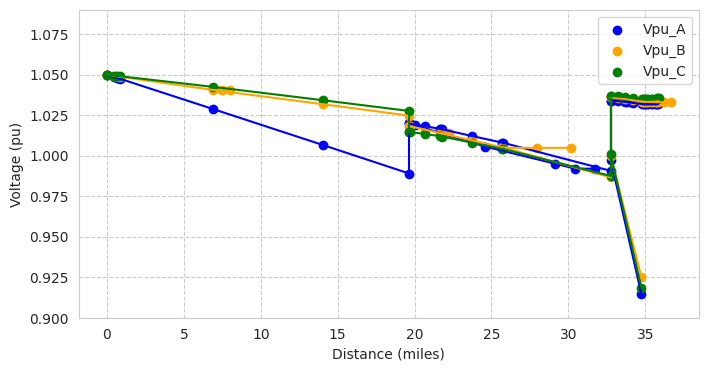

In [9]:
# Plot voltage profile
fig, ax = plt.subplots(1, 1, figsize=(8,4))
def plot_voltage_profile(ax, data_label, data_color):

    # Lines
    for _, line in ckt_int.ckt.lines.iterrows():
        ax.plot([ckt_int.ckt.buses['distance'].loc[str(line['bus1'])],
                 ckt_int.ckt.buses['distance'].loc[str(line['bus2'])]],
                [ckt_int.ckt.buses[data_label].loc[str(line['bus1'])],
                 ckt_int.ckt.buses[data_label].loc[str(line['bus2'])]], color=data_color)

    # Transformers
    ax.plot([ckt_int.ckt.buses['distance'].loc['814'],
             ckt_int.ckt.buses['distance'].loc['814r']],
            [ckt_int.ckt.buses[data_label].loc['814'],
             ckt_int.ckt.buses[data_label].loc['814r']], color=data_color)
    ax.plot([ckt_int.ckt.buses['distance'].loc['852'],
             ckt_int.ckt.buses['distance'].loc['852r']],
            [ckt_int.ckt.buses[data_label].loc['852'],
             ckt_int.ckt.buses[data_label].loc['852r']], color=data_color)
    ax.plot([ckt_int.ckt.buses['distance'].loc['832'],
             ckt_int.ckt.buses['distance'].loc['888']],
            [ckt_int.ckt.buses[data_label].loc['832'],
             ckt_int.ckt.buses[data_label].loc['888']], color=data_color)

    # Bus voltages
    ax.scatter(ckt_int.ckt.buses['distance'], ckt_int.ckt.buses[data_label], label=data_label, color=data_color)
    
plot_voltage_profile(ax,'Vpu_A','blue')
plot_voltage_profile(ax,'Vpu_B','orange')
plot_voltage_profile(ax,'Vpu_C','green')
ax.set_xlabel('Distance (miles)')
ax.set_ylabel('Voltage (pu)')
ax.set_ylim(0.9, 1.09)
ax.grid(visible=True)
ax.legend()
plt.show()